In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('Corona_NLP_train.csv', encoding='latin1')

In [6]:
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


### Cleaning the dataset

In [7]:
import re 
texts=[]
for i in range(0,len(dataset)):
  text = re.sub('[^a-zA-Z]' , ' ', dataset['OriginalTweet'][i])
  text = text.lower()
  text = text.split()
  x = len(text) if text.count('https') ==0  else text.index('https') 
  text = text[: x ]
  text = [t for t in text if not t=='https']
  text = ' '.join(text)
  texts.append(text)


In [8]:
texts

['menyrbie phil gahan chrisitv',
 'advice talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist gp set up online shopping accounts if poss adequate supplies of regular meds but not over order',
 'coronavirus australia woolworths to give elderly disabled dedicated shopping hours amid covid outbreak',
 'my food stock is not the only one which is empty please don t panic there will be enough food for everyone if you do not take more than you need stay calm stay safe covid france covid covid coronavirus confinement confinementotal confinementgeneral',
 'me ready to go at supermarket during the covid outbreak not because i m paranoid but because my food stock is litteraly empty the coronavirus is a serious thing but please don t panic it causes shortage coronavirusfrance restezchezvous stayathome confinement',
 'as news of the region s first confirmed covid case came out of sullivan county last week people floc

In [9]:
len(texts)

41157

In [10]:
from gensim.models import Word2Vec

In [12]:
sentences = [line.split() for line in texts]

w2v =Word2Vec(sentences, vector_size=100, window=5, workers=4, epochs=10, min_count=5)

In [14]:
w2v.wv.key_to_index

{'the': 0,
 'to': 1,
 'and': 2,
 'of': 3,
 'covid': 4,
 'a': 5,
 'in': 6,
 'coronavirus': 7,
 'for': 8,
 'is': 9,
 'are': 10,
 'i': 11,
 'you': 12,
 'on': 13,
 's': 14,
 'this': 15,
 'prices': 16,
 'at': 17,
 'it': 18,
 'food': 19,
 'supermarket': 20,
 'we': 21,
 'store': 22,
 'that': 23,
 'with': 24,
 'grocery': 25,
 'have': 26,
 'as': 27,
 'be': 28,
 'people': 29,
 't': 30,
 'from': 31,
 'amp': 32,
 'all': 33,
 'can': 34,
 'consumer': 35,
 'your': 36,
 'not': 37,
 'will': 38,
 'they': 39,
 'my': 40,
 'our': 41,
 'up': 42,
 'out': 43,
 'has': 44,
 'or': 45,
 'by': 46,
 'more': 47,
 'but': 48,
 'shopping': 49,
 'if': 50,
 'online': 51,
 'how': 52,
 'their': 53,
 'during': 54,
 'pandemic': 55,
 'so': 56,
 'now': 57,
 'no': 58,
 'what': 59,
 'get': 60,
 'about': 61,
 'who': 62,
 'need': 63,
 'workers': 64,
 'panic': 65,
 'just': 66,
 'there': 67,
 'us': 68,
 'do': 69,
 'like': 70,
 'time': 71,
 'sanitizer': 72,
 'home': 73,
 'was': 74,
 'an': 75,
 'demand': 76,
 'go': 77,
 'when': 78,
 '

In [16]:
w2v.wv.index_to_key.__sizeof__()

85160

In [19]:
sentences[20:25]

[['with',
  'nations',
  'inficted',
  'with',
  'covid',
  'the',
  'world',
  'must',
  'not',
  'play',
  'fair',
  'with',
  'china',
  'goverments',
  'must',
  'demand',
  'china',
  'adopts',
  'new',
  'guilde',
  'lines',
  'on',
  'food',
  'safty',
  'the',
  'chinese',
  'goverment',
  'is',
  'guilty',
  'of',
  'being',
  'irosponcible',
  'with',
  'life',
  'on',
  'a',
  'global',
  'scale'],
 [],
 ['we',
  'have',
  'amazing',
  'cheap',
  'deals',
  'for',
  'the',
  'covid',
  'going',
  'on',
  'to',
  'help',
  'you',
  'trials',
  'monthly',
  'yearly',
  'and',
  'resonable',
  'prices',
  'subscriptions',
  'just',
  'dm',
  'us',
  'bestiptv',
  'iptv',
  'service',
  'iptv',
  'iptvdeals',
  'cheap',
  'iptv',
  'football',
  'hd',
  'movies',
  'adult',
  'cinema',
  'hotmovies',
  'iptvnew',
  'iptv',
  'adult'],
 ['we',
  'have',
  'amazing',
  'cheap',
  'deals',
  'for',
  'the',
  'covid',
  'going',
  'on',
  'to',
  'help',
  'you',
  'trials',
  'mon

In [21]:
w2v.wv['computer']

array([ 0.24535333,  0.04823548,  0.17638205, -0.02398333, -0.08356204,
       -0.3449635 , -0.09053835,  0.2809985 ,  0.03981739,  0.06338356,
       -0.15138127,  0.12859422,  0.19627787,  0.28893203,  0.24591413,
       -0.03261973,  0.17434104, -0.25119275, -0.05066396, -0.28347006,
        0.36306942,  0.07776906,  0.18027456, -0.09482066, -0.28440025,
        0.03750876, -0.31780908, -0.1547747 ,  0.04060443,  0.17454904,
        0.14927162,  0.12275902, -0.06422152, -0.15432861, -0.06931717,
        0.17904495, -0.39705017, -0.19821964,  0.03481373,  0.07583845,
       -0.12495038, -0.15111135,  0.14664097, -0.03622502,  0.17162889,
        0.02117321,  0.03612887, -0.05696018, -0.00056136,  0.21416093,
        0.12213797, -0.04262708, -0.2674159 , -0.1306024 , -0.15819842,
       -0.13400523,  0.15416582,  0.14431718, -0.02939036,  0.094055  ,
       -0.2552145 ,  0.01592639, -0.13560413, -0.04786962, -0.33040977,
        0.39335957,  0.08135088,  0.1804167 , -0.02738095,  0.30

In [22]:
w2v.wv.similarity('vladimir','putin')

0.82281715

In [23]:
w2v.wv.similarity('vladimir', 'modi')

0.6135961

In [26]:
w2v.wv.most_similar('pay')

[('paid', 0.6948773860931396),
 ('paying', 0.6932317614555359),
 ('bills', 0.6539440155029297),
 ('wages', 0.6162787675857544),
 ('raise', 0.6128488779067993),
 ('rent', 0.5972754955291748),
 ('receive', 0.5904648303985596),
 ('cancel', 0.583260178565979),
 ('benefits', 0.5802208781242371),
 ('hazard', 0.575936496257782)]

In [27]:
w2v.wv.most_similar('covid')

[('coronavirus', 0.6247130632400513),
 ('virus', 0.5530956983566284),
 ('corona', 0.49266156554222107),
 ('disease', 0.4645571708679199),
 ('coronaviruschallenge', 0.45501914620399475),
 ('novel', 0.4353874921798706),
 ('coronacrisis', 0.4350588619709015),
 ('convid', 0.42581355571746826),
 ('coronavirusnyc', 0.41940581798553467),
 ('flattenthecurve', 0.41906026005744934)]

In [28]:
w2v.wv.most_similar('india')

[('pakistan', 0.7788069248199463),
 ('nigeria', 0.7538776397705078),
 ('kenya', 0.6857379078865051),
 ('ohio', 0.6586260795593262),
 ('hindustan', 0.6444681286811829),
 ('goi', 0.6372426748275757),
 ('ksa', 0.6343207955360413),
 ('finminindia', 0.6317889094352722),
 ('irvpaswan', 0.6292096972465515),
 ('oman', 0.6240327954292297)]

In [34]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model.wv[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

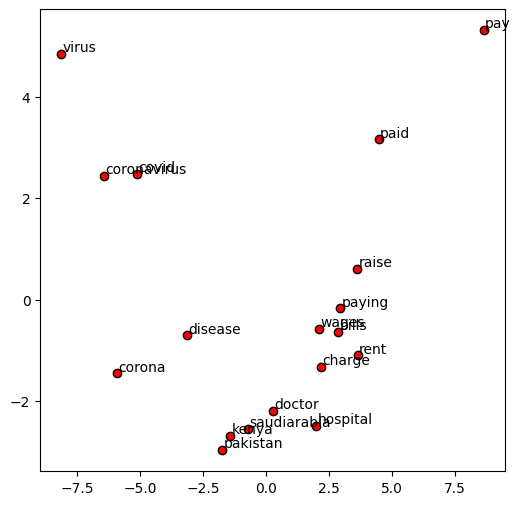

In [35]:
display_pca_scatterplot(w2v,['coronavirus', 'covid', 'virus', 'corona','disease', 'saudiarabia',  'doctor', 'hospital', 'pakistan', 'kenya',
                             'pay', 'paying', 'paid', 'wages', 'raise', 'bills', 'rent', 'charge']  )

In [36]:
w2v.save("word2vec.model")

In [37]:
model = Word2Vec.load("word2vec.model")
model.train([["hello", "world"]], total_examples=1, epochs=1)

(2, 2)